In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import random


In [6]:


def generate_data(nx, qtde, pmax):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde):
        # potencial de grau p aleatório
        a, b = np.random.uniform(0, 2, 2)
        

        coeffs5 = [a, b, -a, -b, 0]
        coeffs4 = [a, b, -a, -b]
        #coeffs3 = [a, -a, 0]
        coeffs2 = [a, -a]
        
        all_roots = [coeffs5, coeffs4, coeffs2]

        # Randomly choose one of the lists
        root = random.choice(all_roots)
        coeffs = np.poly(root)


        polinomio = np.polyval(coeffs, x)
        noise = 0.01 * np.random.randn(len(x)).reshape(-1, 1)
        y.append(polinomio / np.max(np.abs(polinomio)) + noise)
        
        # derivada
        derivada = np.polyval(np.polyder(coeffs), x)
        noise = 0.01 * np.random.randn(len(x)).reshape(-1, 1)
        dy.append(derivada / np.max(np.abs(derivada)) + noise)
    
    # empilha dados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# gerar dados
y, dy = generate_data(50, 10000, 0)

print(y.shape)
print(dy.shape)

(10000, 50)
(10000, 50)


In [7]:
# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 0.18258198
Iteration 2, loss = 0.12606692
Iteration 3, loss = 0.07374278
Iteration 4, loss = 0.04986887
Iteration 5, loss = 0.03997837
Iteration 6, loss = 0.03217995
Iteration 7, loss = 0.02522841
Iteration 8, loss = 0.02103152
Iteration 9, loss = 0.01804399
Iteration 10, loss = 0.01571690
Iteration 11, loss = 0.01385955
Iteration 12, loss = 0.01219297
Iteration 13, loss = 0.01052747
Iteration 14, loss = 0.00882606
Iteration 15, loss = 0.00724619
Iteration 16, loss = 0.00598155
Iteration 17, loss = 0.00503665
Iteration 18, loss = 0.00431990
Iteration 19, loss = 0.00375683
Iteration 20, loss = 0.00328662
Iteration 21, loss = 0.00287514
Iteration 22, loss = 0.00251678
Iteration 23, loss = 0.00217995
Iteration 24, loss = 0.00189581
Iteration 25, loss = 0.00165326
Iteration 26, loss = 0.00146679
Iteration 27, loss = 0.00129751
Iteration 28, loss = 0.00116572
Iteration 29, loss = 0.00106031
Iteration 30, loss = 0.00097182
Iteration 31, loss = 0.00089367
Iteration 32, los

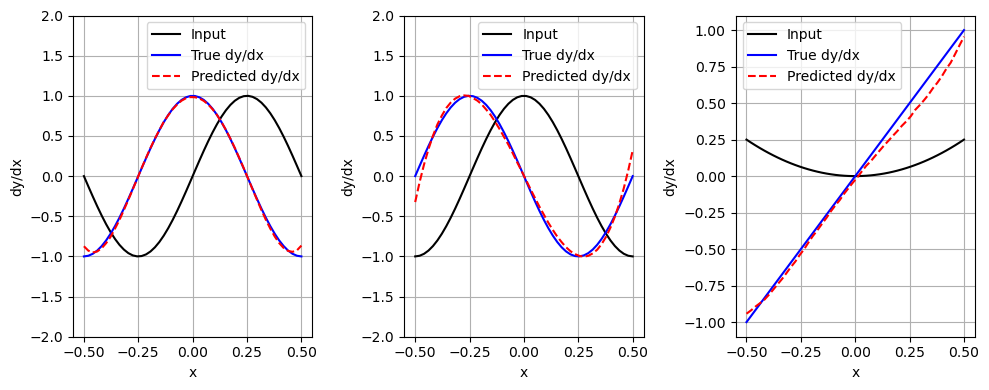

In [8]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(-0.5, 0.5, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()